 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).
 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?
 3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

Модифицируем функцию поиска коэффициентов, добавив возможность менять функцию стоимости (mse, mae)

In [64]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

def calc_mae(y, y_pred):
  err = np.mean(np.abs(y - y_pred))
  return err

def eval_model_reg2(X, y, iterations=1e+7, loss=calc_mse, alpha=1e-4, lambda_=1e-8, eps=1e-5):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  last_err = np.inf
  for i in range(1, iterations+1):
    y_pred = np.dot(W, X)
    err = loss(y, y_pred)
    W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#     if i % (iterations / 10) == 0:
#       print(lambda_, i, W, err)
    if i == iterations:
        print(f"Достигнут максимум итерации, функция потерь равна {err:.4f}")
        break
    elif np.abs(last_err - err) < eps:
        print(f"Решение сошлось на итерации {i}, значение функции потерь равно {err:.4f}")
        break
    else:
        last_err = err
  return W, err, i

def calc_std_feat(x):
  res = (x.copy() - x.mean()) / x.std()
  return res


In [20]:
# Выполним стандартизацию значений признаком
X_std = calc_std_feat(X)
X_std

array([[-0.50201588, -0.50201588, -0.50201588, -0.50201588, -0.50201588,
        -0.50201588, -0.50201588, -0.50201588, -0.50201588, -0.50201588],
       [-0.50201588, -0.50201588, -0.49995907, -0.50201588, -0.49790226,
        -0.50407269, -0.49378864, -0.48350459, -0.50201588, -0.49995907],
       [ 0.52433227,  0.93569425,  1.03853475,  0.73001326,  2.4783017 ,
         1.14137525,  2.58114219,  3.60954715,  0.42149177,  1.55273723],
       [-0.50201588, -0.50201588, -0.49995907, -0.50201588, -0.49995907,
        -0.50201588, -0.49790226, -0.49790226, -0.50201588, -0.49995907]])

In [65]:
# Убедимся, что в конечном итоге модель должна сойтись даже при дефолтном значении коэффициента обучения
print(eval_model_reg2(X_std, y, iterations=200000, alpha = 0.01, loss=calc_mse, lambda_=0)) # без регуляризации


Решение сошлось на итерации 1584, значение функции потерь равно 53.5896
(array([-27.50786357, -28.08766052,  10.87224028, -26.44553468]), 53.589560570654555, 1584)


In [66]:
print(eval_model_reg2(X_std, y, iterations=200000, alpha = 0.01, loss=calc_mae, lambda_=0))

Решение сошлось на итерации 1490, значение функции потерь равно 5.1942
(array([-27.48406688, -28.07873653,  10.88526611, -26.42532601]), 5.194169327235243, 1490)


In [71]:
tst_w = []
tst_lambda = []
tst_loss = []

for lambda_ in np.linspace(1e-8, 1, 100): # Перебираем скорость градиентного спуска
    tst = eval_model_reg2(X_std, y, iterations=200000, alpha = 0.01, loss=calc_mse, lambda_=lambda_)
    tst_w.append(tst[0]) 
    tst_loss.append(tst[1])
    tst_lambda.append(lambda_)

Решение сошлось на итерации 1584, значение функции потерь равно 53.5896
Решение сошлось на итерации 2190, значение функции потерь равно 53.7827
Решение сошлось на итерации 2301, значение функции потерь равно 54.3287
Решение сошлось на итерации 2336, значение функции потерь равно 55.1796
Решение сошлось на итерации 2340, значение функции потерь равно 56.2933
Решение сошлось на итерации 2328, значение функции потерь равно 57.6336
Решение сошлось на итерации 2308, значение функции потерь равно 59.1691
Решение сошлось на итерации 2283, значение функции потерь равно 60.8724
Решение сошлось на итерации 2255, значение функции потерь равно 62.7199
Решение сошлось на итерации 2225, значение функции потерь равно 64.6907
Решение сошлось на итерации 2194, значение функции потерь равно 66.7671
Решение сошлось на итерации 2163, значение функции потерь равно 68.9331
Решение сошлось на итерации 2132, значение функции потерь равно 71.1750
Решение сошлось на итерации 2101, значение функции потерь равно 

In [141]:
w_ = np.array(tst_w).T

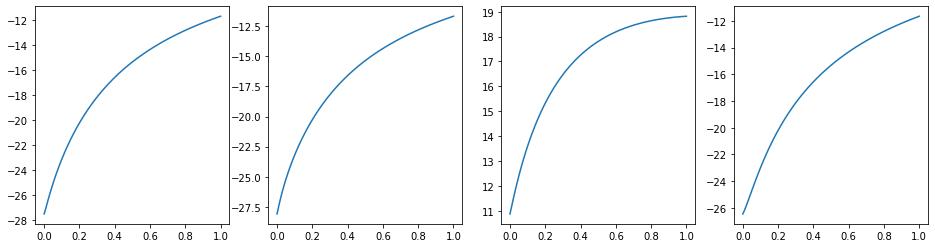

In [142]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,4))
for i, ax in enumerate(axes):
    ax.plot(tst_lambda, w_[i])


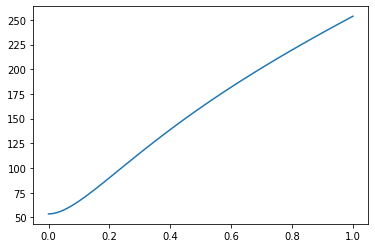

In [143]:
plt.plot(tst_lambda, tst_loss)

Графики показывают, что с увеличением коээфициента L2 регуляризации значения коэффициентов уменьшается, по модулю, кроме коэффициента w2 (оплата труда репетитора). Но при этом вырастает значение функции потерь.

In [150]:
# Для loss = mae

tst_w = []
tst_lambda = []
tst_loss = []

for lambda_ in np.linspace(1e-8, 1, 100): # Перебираем скорость градиентного спуска
    tst = eval_model_reg2(X_std, y, iterations=200000, alpha = 0.01, loss=calc_mae, lambda_=lambda_)
    tst_w.append(tst[0]) 
    tst_loss.append(tst[1])
    tst_lambda.append(lambda_)

Решение сошлось на итерации 1490, значение функции потерь равно 5.1942
Решение сошлось на итерации 1811, значение функции потерь равно 5.2401
Решение сошлось на итерации 1767, значение функции потерь равно 5.3251
Решение сошлось на итерации 1726, значение функции потерь равно 5.4058
Решение сошлось на итерации 1864, значение функции потерь равно 5.5526
Решение сошлось на итерации 1822, значение функции потерь равно 5.7272
Решение сошлось на итерации 1782, значение функции потерь равно 5.8940
Решение сошлось на итерации 1809, значение функции потерь равно 6.1078
Решение сошлось на итерации 1771, значение функции потерь равно 6.3253
Решение сошлось на итерации 1734, значение функции потерь равно 6.5342
Решение сошлось на итерации 1699, значение функции потерь равно 6.7348
Решение сошлось на итерации 1666, значение функции потерь равно 6.9278
Решение сошлось на итерации 1633, значение функции потерь равно 7.1135
Решение сошлось на итерации 1602, значение функции потерь равно 7.2924
Решени

In [151]:
w_ = np.array(tst_w).T

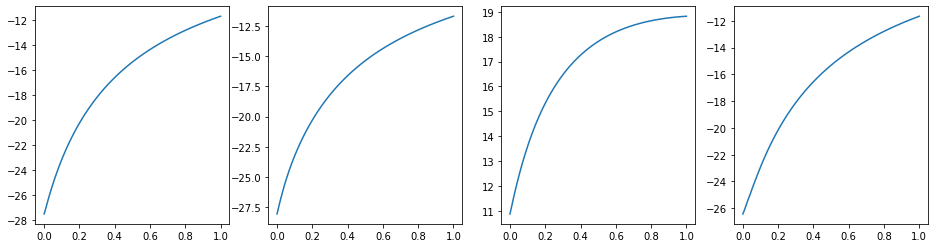

In [152]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,4))
for i, ax in enumerate(axes):
    ax.plot(tst_lambda, w_[i])

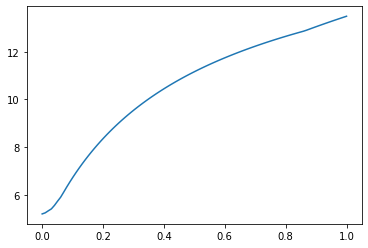

In [153]:
plt.plot(tst_lambda, tst_loss)

Ситуация аналогичная предыдущей

2. К однму и тому же признаку, с технической стороны, применять нормализацию и стандартизацию можно, но это действите <strong>лишено смысла</strong>. Нормальизация "ужимает" масштаб изменения признаков до диапазона [0.1], стандартизация приводит к виду стандартного распределения, масштабируя как диапазон изменения, так и значения дисперсий.


Часть, которая без регуляризации, остаётся без изменений. 
$$|x|' = \frac {x}{|x|}, x \neq 0$$

Реализовать можно через np.sign, на выходе которой будет знак x

In [147]:
def eval_model_reg1(X, y, iterations=1e+7, loss=calc_mse, alpha=1e-4, lambda_=1e-8, eps=1e-5):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  last_err = np.inf
  for i in range(1, iterations+1):
    y_pred = np.dot(W, X)
    err = loss(y, y_pred)
    W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ *  np.sign(W)/2) 
#     if i % (iterations / 10) == 0:
#       print(lambda_, i, W, err)
    if i == iterations:
        print(f"Достигнут максимум итерации, функция потерь равна {err:.4f}")
        break
    elif np.abs(last_err - err) < eps:
        print(f"Решение сошлось на итерации {i}, значение функции потерь равно {err:.4f}")
        break
    else:
        last_err = err
  return W, err, i

In [154]:
print(eval_model_reg1(X_std, y, iterations=200000, alpha = 0.01, loss=calc_mae, lambda_=1))

Решение сошлось на итерации 1847, значение функции потерь равно 5.2784
(array([-26.71470554, -27.2677907 ,  11.34710073, -25.66029347]), 5.278434992499464, 1847)


In [155]:


tst_w = []
tst_lambda = []
tst_loss = []

for lambda_ in np.linspace(1e-8, 1, 100): # Перебираем скорость градиентного спуска
    tst = eval_model_reg1(X_std, y, iterations=200000, alpha = 0.01, loss=calc_mae, lambda_=lambda_)
    tst_w.append(tst[0]) 
    tst_loss.append(tst[1])
    tst_lambda.append(lambda_)

Решение сошлось на итерации 1490, значение функции потерь равно 5.1942
Решение сошлось на итерации 1489, значение функции потерь равно 5.1943
Решение сошлось на итерации 1489, значение функции потерь равно 5.1945
Решение сошлось на итерации 1489, значение функции потерь равно 5.1947
Решение сошлось на итерации 1489, значение функции потерь равно 5.1948
Решение сошлось на итерации 1489, значение функции потерь равно 5.1950
Решение сошлось на итерации 1489, значение функции потерь равно 5.1952
Решение сошлось на итерации 1489, значение функции потерь равно 5.1953
Решение сошлось на итерации 1215, значение функции потерь равно 5.1905
Решение сошлось на итерации 1489, значение функции потерь равно 5.1957
Решение сошлось на итерации 1489, значение функции потерь равно 5.1958
Решение сошлось на итерации 1237, значение функции потерь равно 5.1917
Решение сошлось на итерации 1488, значение функции потерь равно 5.1962
Решение сошлось на итерации 1488, значение функции потерь равно 5.1963
Решени

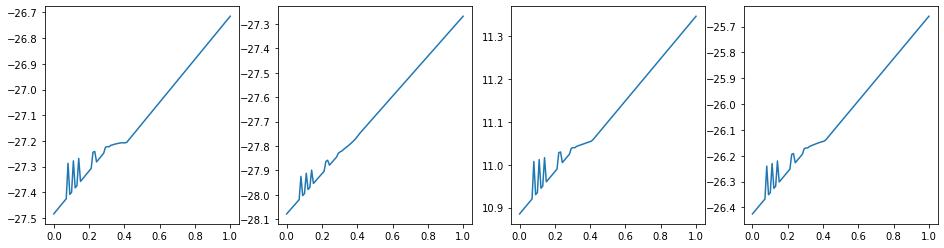

In [156]:
w_ = np.array(tst_w).T
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,4))
for i, ax in enumerate(axes):
    ax.plot(tst_lambda, w_[i])

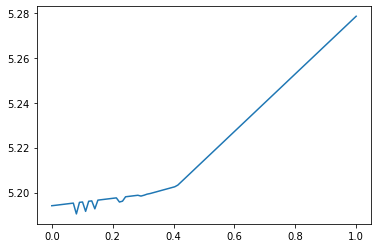

In [157]:
plt.plot(tst_lambda, tst_loss)

In [158]:
tst_w = []
tst_lambda = []
tst_loss = []

for lambda_ in np.linspace(1e-8, 1, 100): # Перебираем скорость градиентного спуска
    tst = eval_model_reg1(X_std, y, iterations=200000, alpha = 0.01, loss=calc_mse, lambda_=lambda_)
    tst_w.append(tst[0]) 
    tst_loss.append(tst[1])
    tst_lambda.append(lambda_)

Решение сошлось на итерации 1584, значение функции потерь равно 53.5896
Решение сошлось на итерации 1609, значение функции потерь равно 53.5898
Решение сошлось на итерации 1635, значение функции потерь равно 53.5901
Решение сошлось на итерации 1660, значение функции потерь равно 53.5904
Решение сошлось на итерации 1684, значение функции потерь равно 53.5908
Решение сошлось на итерации 1708, значение функции потерь равно 53.5913
Решение сошлось на итерации 1730, значение функции потерь равно 53.5919
Решение сошлось на итерации 1751, значение функции потерь равно 53.5926
Решение сошлось на итерации 1772, значение функции потерь равно 53.5934
Решение сошлось на итерации 1791, значение функции потерь равно 53.5943
Решение сошлось на итерации 1809, значение функции потерь равно 53.5952
Решение сошлось на итерации 1827, значение функции потерь равно 53.5963
Решение сошлось на итерации 1843, значение функции потерь равно 53.5975
Решение сошлось на итерации 1859, значение функции потерь равно 

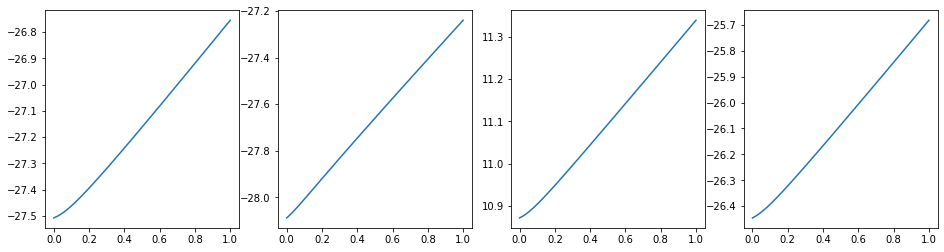

In [159]:
w_ = np.array(tst_w).T
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,4))
for i, ax in enumerate(axes):
    ax.plot(tst_lambda, w_[i])

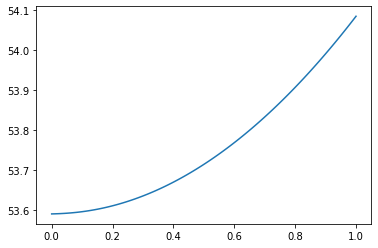

In [160]:
plt.plot(tst_lambda, tst_loss)